<a href="https://colab.research.google.com/github/SarraBenHamad/CarPricingPrediction/blob/main/carPricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarrabenhamad","key":"bf5964dd44bc3d1819ab16cdfb27a968"}'}

In [4]:
#create a folder move the file in it and change les droits
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [87]:
!kaggle datasets download -d sukhmandeepsinghbrar/car-price-prediction-dataset


Dataset URL: https://www.kaggle.com/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset
License(s): CC0-1.0
  0% 0.00/141k [00:00<?, ?B/s]
100% 141k/141k [00:00<00:00, 68.1MB/s]


In [88]:
!unzip car-price-prediction-dataset.zip -d /content/dataset


Archive:  car-price-prediction-dataset.zip
  inflating: /content/dataset/cardekho.csv  


In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
import pandas as pd

df= pd.read_csv('/content/dataset/cardekho.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [90]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [91]:
# manufacturer_encoder = LabelEncoder()
# model_encoder = LabelEncoder()
# category_encoder = LabelEncoder()
# fuel_type_encoder = LabelEncoder()
# leather_interior_encoder = LabelEncoder()
# Gear_box_type_encoder=  LabelEncoder()
# drive_wheel_encoder=  LabelEncoder()
# color_encoder=  LabelEncoder()
# wheels_encoder=  LabelEncoder()

# df['Manufacturer'] = manufacturer_encoder.fit_transform(df['Manufacturer'])
# df['Model'] = model_encoder.fit_transform(df['Model'])
# df['Category'] = category_encoder.fit_transform(df['Category'])
# df['Fuel type'] = fuel_type_encoder.fit_transform(df['Fuel type'])
# df['Leather interior'] = leather_interior_encoder.fit_transform(df['Leather interior'])
# df['Gear box type'] = Gear_box_type_encoder.fit_transform(df['Gear box type'])
# df['Drive wheels'] = drive_wheel_encoder.fit_transform(df['Drive wheels'])
# df['Color'] = color_encoder.fit_transform(df['Color'])
# df['Wheel']= wheels_encoder.fit_transform(df['Wheel'])



categorical_list=df.astype('object')

for col in categorical_list :
        encoder=LabelEncoder()
        df[col]=encoder.fit_transform(df[col])


# df['Doors'] = df['Doors'].astype(str).str.extract('(\d+)').astype(float)

# df['Mileage'] = df['Mileage'].astype(str).str.replace(' km', '').astype(float)


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   name                8128 non-null   int64
 1   year                8128 non-null   int64
 2   selling_price       8128 non-null   int64
 3   km_driven           8128 non-null   int64
 4   fuel                8128 non-null   int64
 5   seller_type         8128 non-null   int64
 6   transmission        8128 non-null   int64
 7   owner               8128 non-null   int64
 8   mileage(km/ltr/kg)  8128 non-null   int64
 9   engine              8128 non-null   int64
 10  max_power           8128 non-null   int64
 11  seats               8128 non-null   int64
dtypes: int64(12)
memory usage: 762.1 KB


In [93]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1307,22,282,781,1,1,1,0,325,24,244,2
1,1607,22,229,732,1,1,1,2,275,47,15,2
2,385,14,94,770,3,1,1,4,175,46,253,2
3,781,18,136,748,1,1,1,0,317,35,295,2
4,1349,15,74,732,3,1,1,0,133,25,287,2


In [94]:
#replace hyphens with NaN and convert to numeric
for column in df.select_dtypes(include=['object']).columns:
    df[column] = pd.to_numeric(df[column].str.replace('-', 'NaN'), errors='coerce')

In [95]:
#check for missing values
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


In [97]:
# df.drop(columns=['Car ID'],axis=1,inplace=True)
# df.isnull().sum()

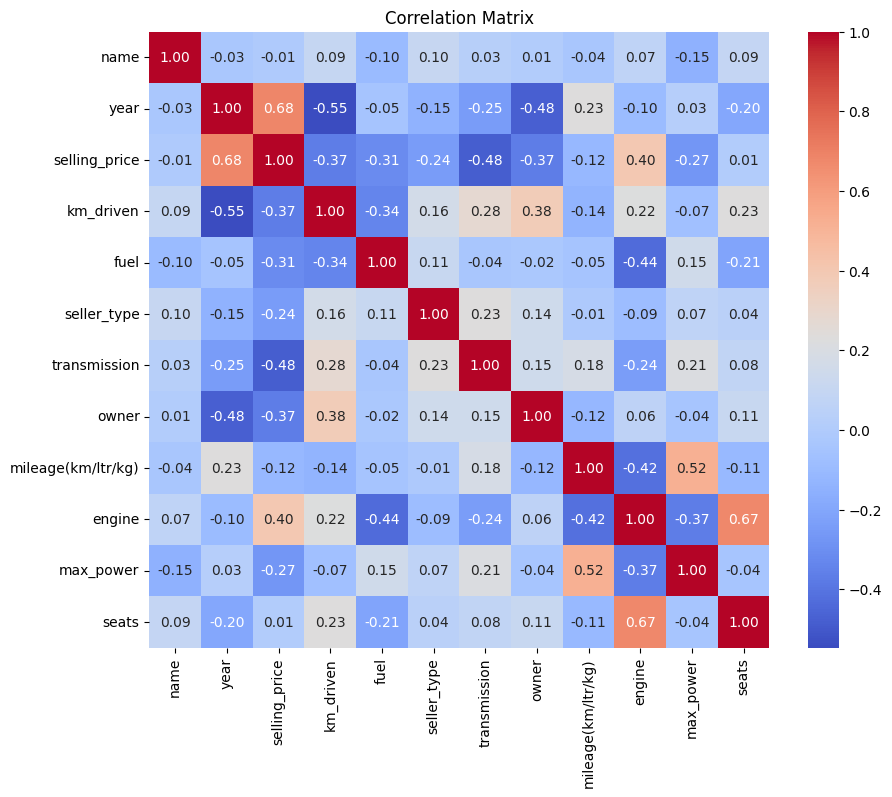

In [98]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [99]:
df.drop(columns=['name','seats'],axis=1,inplace=True)


In [100]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power
0,22,282,781,1,1,1,0,325,24,244
1,22,229,732,1,1,1,2,275,47,15
2,14,94,770,3,1,1,4,175,46,253
3,18,136,748,1,1,1,0,317,35,295
4,15,74,732,3,1,1,0,133,25,287


In [101]:
x = df[['year', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage(km/ltr/kg)','engine','max_power']]

y=df[['selling_price']]


In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [103]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [104]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 6411.3065336276495
R-squared: 0.7531991912452817


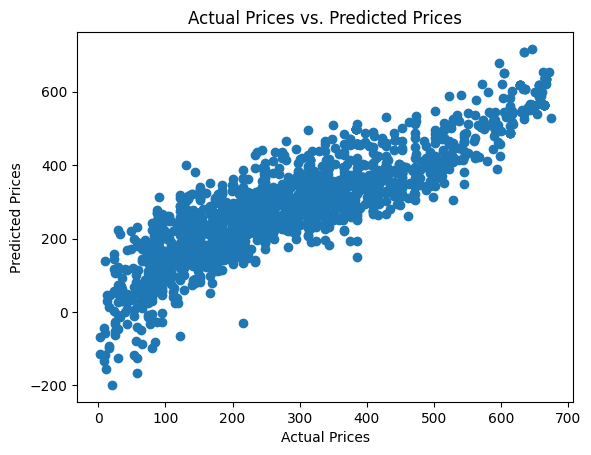

In [105]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()